## Example 5.3 in Chapra book 'Surface Water Quality Modeling'

In [40]:
import numpy as np
import matplotlib.pyplot as plt

In [41]:
# Lake parameters, Superior, Michigan, Huron, Erie, Ontario

H = np.array([146, 85, 59, 19, 86]) # depth: m
A = np.array([82100, 57750, 59750, 25212, 18960])*1e6 # surface area (m^2)
V = np.array([12000, 4900, 3500, 468, 1634])*1e9 # Volume (m^3)
Q = np.array([67, 36, 161, 182, 212])*1e9 # outflow, m^3/yr 

Jsr = 70e-9  # fallout flux, Ci/m^2
k = 0.0241   # reactioin rate, 1/yr

In [43]:
# initial concentration in each lake
c0 = Jsr/H # Ci/m^3
print('Initial concentration =', c0, 'Ci/m^3')

# Eigenvalues due to reaction in each lake
lamb = Q/V + k
print('Lambda1 = ', lamb, '/yr')

# Eigenvalues due to inflow from headwater lakes, only Lake Huron, Erie, and Ontario have values
lamb_SH = Q[0]/V[2] # Superior to Huron
lamb_MH = Q[0]/V[2] # Michigan to Huron
lamb_HEO = np.array([Q[2]/V[3], Q[3]/V[4]]) # Huron to Erie to Ontanrio

Initial concentration = [4.79452055e-10 8.23529412e-10 1.18644068e-09 3.68421053e-09
 8.13953488e-10] Ci/m^3
Lambda1 =  [0.02968333 0.03144694 0.0701     0.41298889 0.15384296] /yr


Text(0, 0.5, 'Concentration')

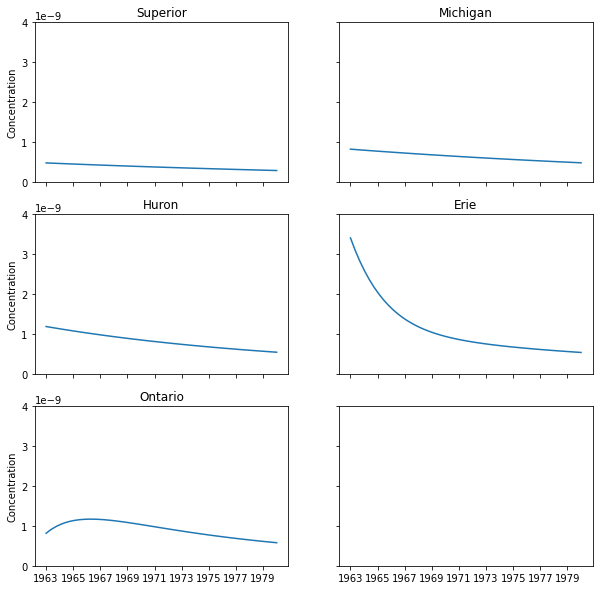

In [48]:
# Lake Superior and Lake Michigan are the two independent headwater lakes, so solution for these two lakes are:
t0 = 1963 # the year of impulse
t = np.linspace(t0,1980)

# Lake Superior, Equation 5.18
c1 = c0[0]*np.exp(-lamb[0]*(t-t0))
# Lake Michigan, Equation 5.18
c2 = c0[1]*np.exp(-lamb[1]*(t-t0))

# Lake Huron, Equation 5.19
c3 = c0[2]*np.exp(-lamb[2]*(t-t0)) + \
     lamb_SH*c0[0]/(lamb[2]-lamb[0]) * (np.exp(-lamb[0]*(t-t0)) - np.exp(-lamb[2]*(t-t0))) + \
     lamb_MH*c0[1]/(lamb[2]-lamb[1]) * (np.exp(-lamb[1]*(t-t0)) - np.exp(-lamb[2]*(t-t0)))

# Lake Erie, Equation 5.20
c4 = c0[3]*np.exp(-lamb[3]*(t-t0)) + \
     lamb_HEO[0]*c0[2]/(lamb[3]-lamb[2]) * (np.exp(-lamb[2]*(t-t0)) - np.exp(-lamb[3]*(t-t0))) + \
     lamb[3]*lamb_SH*c0[0]/(lamb[2]-lamb[0]) * ((np.exp(-lamb[0]*(t-t0))-np.exp(-lamb[3]*(t-t0)))/(lamb[3]-lamb[0]) - (np.exp(-lamb[2]*(t-t0)-np.exp(-lamb[3]*(t-t0))))/(lamb[3]-lamb[2])) + \
     lamb[3]*lamb_MH*c0[1]/(lamb[2]-lamb[1]) * ((np.exp(-lamb[1]*(t-t0))-np.exp(-lamb[3]*(t-t0)))/(lamb[3]-lamb[1]) - (np.exp(-lamb[2]*(t-t0)-np.exp(-lamb[3]*(t-t0))))/(lamb[3]-lamb[2]))

# Lake Ontario, Equation 5.21
c5 = c0[4]*np.exp(-lamb[4]*(t-t0)) + \
     lamb_HEO[1]*c0[3]/(lamb[4]-lamb[3]) * (np.exp(-lamb[3]*(t-t0)) - np.exp(-lamb[4]*(t-t0))) + \
     lamb_HEO[1]*lamb_HEO[0]*c0[2]/(lamb[3]-lamb[2]) * ((np.exp(-lamb[2]*(t-t0))-np.exp(-lamb[4]*(t-t0)))/(lamb[4]-lamb[2]) - (np.exp(-lamb[3]*(t-t0))-np.exp(-lamb[4]*(t-t0)))/(lamb[4]-lamb[3])) + \
     lamb_HEO[1]*lamb_HEO[0]*lamb_SH*c0[0]/((lamb[2]-lamb[0])*(lamb[3]-lamb[0])) * ((np.exp(-lamb[0]*(t-t0))-np.exp(-lamb[4]*(t-t0)))/(lamb[4]-lamb[0]) - (np.exp(-lamb[3]*(t-t0))-np.exp(-lamb[4]*(t-t0)))/(lamb[4]-lamb[3])) - \
     lamb_HEO[1]*lamb_HEO[0]*lamb_SH*c0[0]/((lamb[2]-lamb[0])*(lamb[3]-lamb[2])) * ((np.exp(-lamb[2]*(t-t0))-np.exp(-lamb[4]*(t-t0)))/(lamb[4]-lamb[2]) - (np.exp(-lamb[3]*(t-t0))-np.exp(-lamb[4]*(t-t0)))/(lamb[4]-lamb[3])) + \
     lamb_HEO[1]*lamb_HEO[0]*lamb_MH*c0[1]/((lamb[2]-lamb[1])*(lamb[3]-lamb[1])) * ((np.exp(-lamb[1]*(t-t0))-np.exp(-lamb[4]*(t-t0)))/(lamb[4]-lamb[1]) - (np.exp(-lamb[3]*(t-t0))-np.exp(-lamb[4]*(t-t0)))/(lamb[4]-lamb[3])) - \
     lamb_HEO[1]*lamb_HEO[0]*lamb_MH*c0[1]/((lamb[2]-lamb[1])*(lamb[3]-lamb[2])) * ((np.exp(-lamb[2]*(t-t0))-np.exp(-lamb[4]*(t-t0)))/(lamb[4]-lamb[2]) - (np.exp(-lamb[3]*(t-t0))-np.exp(-lamb[4]*(t-t0)))/(lamb[4]-lamb[3]))

fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (10,10), sharex=True, sharey=True)
ax[0,0].plot(t, c1)
ax[0,0].set_ylim([0, 4e-9])
ax[0,0].set_xticks(np.arange(1963,1980,2))
ax[0,0].set_ylabel('Concentration')
ax[0,0].set_title('Superior')

ax[0,1].plot(t, c2)
ax[0,1].set_title('Michigan')

ax[1,0].plot(t, c3)
ax[1,0].set_ylabel('Concentration')
ax[1,0].set_title('Huron')

ax[1,1].plot(t, c4)
ax[1,1].set_title('Erie')

ax[2,0].plot(t, c5)
ax[2,0].set_title('Ontario')
ax[2,0].set_ylabel('Concentration')

## A better version

In [45]:
# Define function to calcuate contribution from each order, Equations 5.22-5.25
def first_order(c0, t, lamb11):
    c = c0 * np.exp(-lamb11*t)
    return c

def second_order(c0, t, lamb11, lamb22, lamb21):
    c = lamb21/(lamb22-lamb11) * (first_order(c0, t, lamb11) - first_order(c0, t, lamb22))
    return c

def third_order(c0, t, lamb11, lamb22, lamb33, lamb32, lamb21):
    c = lamb32/(lamb33-lamb22) * (second_order(c0, t, lamb11, lamb22, lamb21) - \
                                  second_order(c0, t, lamb11, lamb33, lamb21))
    return c

def fourth_order(c0, t, lamb_array, lamb43, lamb32, lamb21):
    c = lamb43/(lamb[3]-lamb[2]) * (third_order(c0, t, lamb[0], lamb[1], lamb[2], lamb32, lamb21) - \
                                    third_order(c0, t, lamb[0], lamb[1], lamb[3], lamb32, lamb21))
    return c


Text(0, 0.5, 'Concentration')

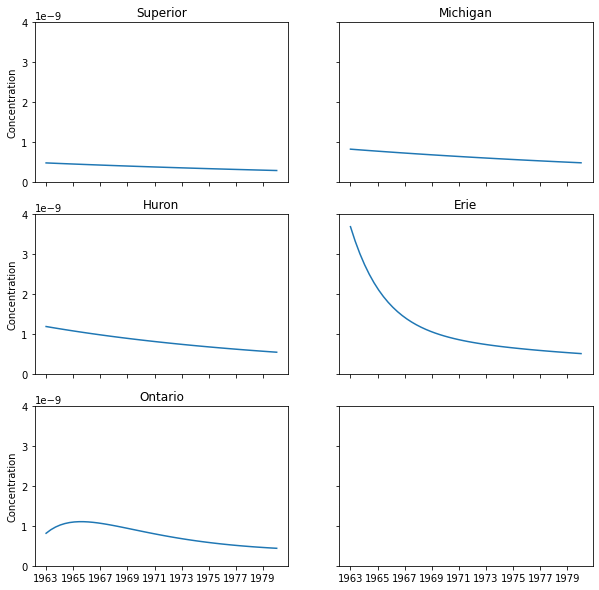

In [46]:
t0 = 1963 # the year of impulse
t = np.linspace(t0,1980) - t0 # years after 1963 impulse

c_S = first_order(c0[0], t, lamb[0])

c_M = first_order(c0[1], t, lamb[1])

c_H = first_order(c0[2], t, lamb[2]) + \
      second_order(c0[0], t, lamb[0], lamb[2], lamb_SH) + \
      second_order(c0[1], t, lamb[1], lamb[2], lamb_MH) 

c_E = first_order(c0[3], t, lamb[3]) + \
      second_order(c0[2], t, lamb[2], lamb[3], lamb_HEO[0]) + \
      third_order(c0[0], t, lamb[0], lamb[2], lamb[3], lamb_HEO[0], lamb_SH) + \
      third_order(c0[1], t, lamb[1], lamb[2], lamb[3], lamb_HEO[0], lamb_MH)

array1 = [0, 2, 3, 4] # Superior --> Huron --> Erie --> Ontario
array2 = [1, 2, 3, 4] # Michigan --> Huron --> Erie --> Ontario
c_O = first_order(c0[4], t, lamb[4]) + \
      second_order(c0[3], t, lamb[3], lamb[4], lamb_HEO[1]) + \
      third_order(c0[0], t, lamb[2], lamb[3], lamb[4], lamb_HEO[1], lamb_HEO[0]) + \
      fourth_order(c0[0], t, lamb[array1], lamb_HEO[1], lamb_HEO[0], lamb_SH) + \
      fourth_order(c0[1], t, lamb[array2], lamb_HEO[1], lamb_HEO[0], lamb_MH)

fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (10,10), sharex=True, sharey=True)
ax[0,0].plot(t+t0, c_S)
ax[0,0].set_ylim([0, 4e-9])
ax[0,0].set_xticks(np.arange(1963,1980,2))
ax[0,0].set_ylabel('Concentration')
ax[0,0].set_title('Superior')

ax[0,1].plot(t+t0, c_M)
ax[0,1].set_title('Michigan')

ax[1,0].plot(t+t0, c_H)
ax[1,0].set_title('Huron')
ax[1,0].set_ylabel('Concentration')

ax[1,1].plot(t+t0, c_E)
ax[1,1].set_title('Erie')

ax[2,0].plot(t+t0, c_O)
ax[2,0].set_title('Ontario')
ax[2,0].set_ylabel('Concentration')

The result shows that the peak concentration in Lake Ontario does not occur in 1963 but lags 2 to 3 years due to upstream effects. 